<h4>Table of content</h4>
<p dir="ltr">1- Importing libraries</p>
<p dir="ltr">2- Data Pre-processing&nbsp;</p>
<p dir="ltr">3- Data Exploring</p>
<p dir="ltr">4- Data Splitting</p>
<p dir="ltr"></p>
<ol>
    <li>Split the data</li>
</ol>
<p></p>
<p dir="ltr">5- Model training</p>
<p dir="ltr"></p>
<ol>
    <li>Random Forest</li>
    <li>Logistic regression</li>
    <li>Neural Network</li>
</ol>
<p></p>
<p dir="ltr">6- Model Evaluation</p>
<p dir="ltr"></p>
<ol>
    <li>Accuracy</li>
    <li>F1 Score</li>
    <li>Recall</li>
    <li>Precision</li>
    <li>Confusion Matrix</li>
</ol>
<p>7- Model Comparison&nbsp;</p>
<p></p>

In [ ]:
Dataset link to download: Dataset is publicly available
at http://www.unb.ca/cic/datasets/IDS2017.html

## Importing the libraries


In [1]:
import pandas as pd
import numpy as np

# For ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Machine learning Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Machine learning model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc, confusion_matrix


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

In [2]:
df=pd.read_csv("data/02-15-2018.csv")

## Data Preprocessing

In [3]:
df.head(3)

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign


In [4]:
df["Label"].value_counts()

Label
Benign                   996077
DoS attacks-GoldenEye     41508
DoS attacks-Slowloris     10990
Name: count, dtype: int64

In [5]:
df.replace(to_replace=["DoS attacks-GoldenEye", "DoS attacks-Slowloris"], value="DDoS", inplace=True)


In [6]:
df["Label"].value_counts()


Label
Benign    996077
DDoS       52498
Name: count, dtype: int64

In [7]:
# Remove the spaces before the column names
df.columns = df.columns.str.strip()

In [8]:
#Unique values in the Label target column

df.loc[:,'Label'].unique()

array(['Benign', 'DDoS'], dtype=object)

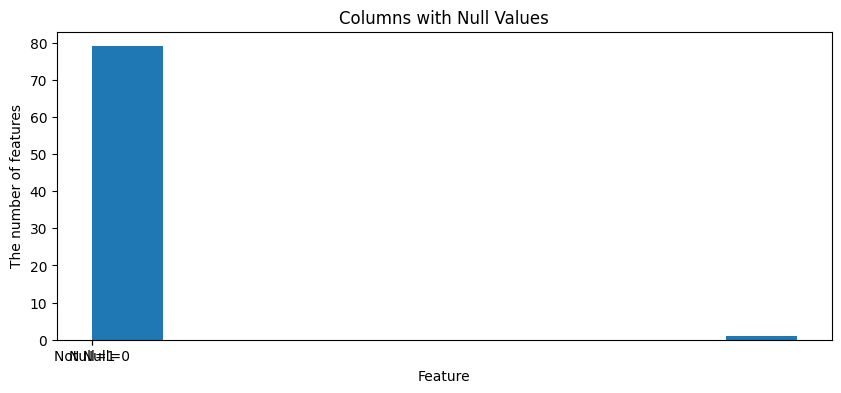

In [9]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( df.isna().sum())
# Set the title and axis labels
plt.xticks([0, 1], labels=['Not Null=0', 'Null=1'])
plt.title('Columns with Null Values')
plt.xlabel('Feature')
plt.ylabel('The number of features')

# Show the plot
plt.show()


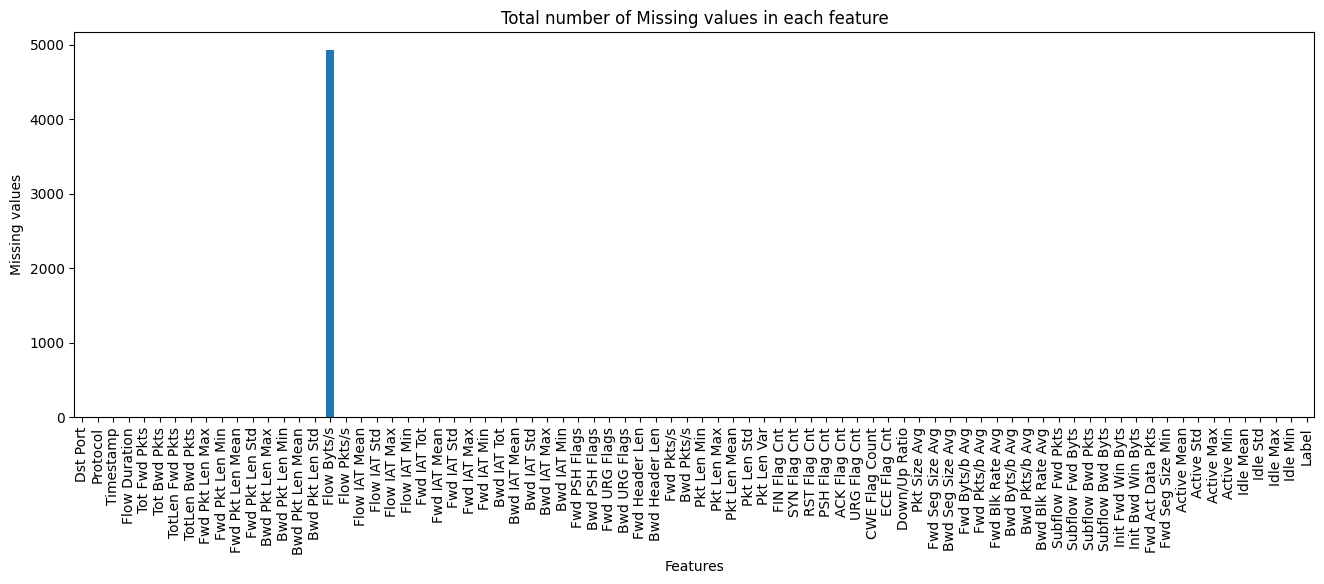

In [10]:
def plotMissingValues(dataframe):
    missing_values = dataframe.isnull().sum()  # Counting null values for each column
    fig = plt.figure(figsize=(16, 5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of Missing values in each feature")
    plt.show()

plotMissingValues(df)


In [11]:
## Removing the null values
data_f=df.dropna()

In [12]:
data_f

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,50111,6,15/02/2018 09:04:42,22,3,0,31,0,31,0,...,20,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
1048571,443,6,15/02/2018 09:03:55,54682783,5,1,123,46,46,0,...,20,158783.0,0.000000,158783,158783,54523813.0,0.000000e+00,54523813,54523813,Benign
1048572,443,6,15/02/2018 09:03:56,53682093,5,1,123,46,46,0,...,20,259719.0,0.000000,259719,259719,53421756.0,0.000000e+00,53421756,53421756,Benign
1048573,443,6,15/02/2018 09:03:55,54683364,5,1,123,46,46,0,...,20,158870.0,0.000000,158870,158870,54523593.0,0.000000e+00,54523593,54523593,Benign


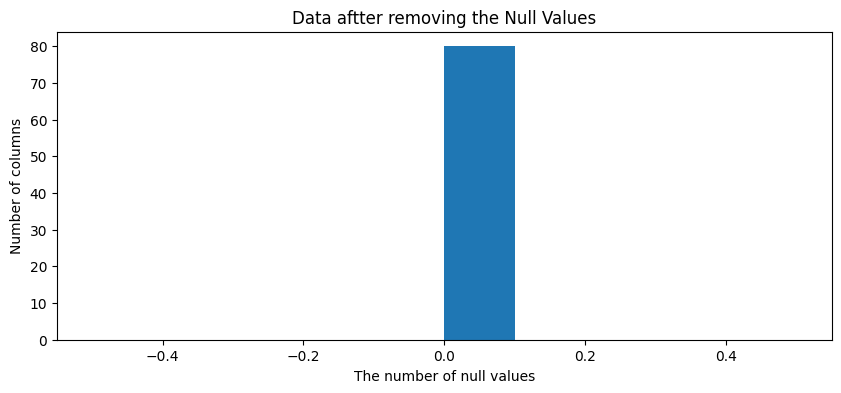

In [13]:
#Checking the null values in the dataset.
plt.figure(1,figsize=( 10,4))
plt.hist( data_f.isna().sum())
# Set the title and axis labels
plt.title('Data aftter removing the Null Values')
plt.xlabel('The number of null values')
plt.ylabel('Number of columns')

# Show the plot
plt.show()


In [14]:
# pd.set_option('use_inf_as_na', True)  # Treat inf as NaN
data_f.replace([np.inf, -np.inf], np.nan, inplace=True)
null_values=data_f.isnull().sum()  # Check for NaN values

/tmp/ipykernel_87179/2672684046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f.replace([np.inf, -np.inf], np.nan, inplace=True)


In [15]:
data_f.drop(['Timestamp'], axis=1, inplace=True)

/tmp/ipykernel_87179/4284345845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f.drop(['Timestamp'], axis=1, inplace=True)


In [16]:
# To know the data types of the columns

(data_f.dtypes=='object')

Dst Port         False
Protocol         False
Flow Duration    False
Tot Fwd Pkts     False
Tot Bwd Pkts     False
                 ...  
Idle Mean        False
Idle Std         False
Idle Max         False
Idle Min         False
Label             True
Length: 79, dtype: bool

In [17]:
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,50111,6,15/02/2018 09:04:42,22,3,0,31,0,31,0,...,20,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
1048571,443,6,15/02/2018 09:03:55,54682783,5,1,123,46,46,0,...,20,158783.0,0.000000,158783,158783,54523813.0,0.000000e+00,54523813,54523813,Benign
1048572,443,6,15/02/2018 09:03:56,53682093,5,1,123,46,46,0,...,20,259719.0,0.000000,259719,259719,53421756.0,0.000000e+00,53421756,53421756,Benign
1048573,443,6,15/02/2018 09:03:55,54683364,5,1,123,46,46,0,...,20,158870.0,0.000000,158870,158870,54523593.0,0.000000e+00,54523593,54523593,Benign


In [18]:
data_f

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,543,2,0,64,0,64,0,32.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,112640703,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,112640874,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,50111,6,22,3,0,31,0,31,0,10.333333,...,20,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
1048571,443,6,54682783,5,1,123,46,46,0,24.600000,...,20,158783.0,0.000000,158783,158783,54523813.0,0.000000e+00,54523813,54523813,Benign
1048572,443,6,53682093,5,1,123,46,46,0,24.600000,...,20,259719.0,0.000000,259719,259719,53421756.0,0.000000e+00,53421756,53421756,Benign
1048573,443,6,54683364,5,1,123,46,46,0,24.600000,...,20,158870.0,0.000000,158870,158870,54523593.0,0.000000e+00,54523593,54523593,Benign


In [19]:
data_f.dropna(inplace=True)

/tmp/ipykernel_87179/2232768339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f.dropna(inplace=True)


In [20]:
data_f

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,543,2,0,64,0,64,0,32.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,112640703,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,112640874,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,50111,6,22,3,0,31,0,31,0,10.333333,...,20,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
1048571,443,6,54682783,5,1,123,46,46,0,24.600000,...,20,158783.0,0.000000,158783,158783,54523813.0,0.000000e+00,54523813,54523813,Benign
1048572,443,6,53682093,5,1,123,46,46,0,24.600000,...,20,259719.0,0.000000,259719,259719,53421756.0,0.000000e+00,53421756,53421756,Benign
1048573,443,6,54683364,5,1,123,46,46,0,24.600000,...,20,158870.0,0.000000,158870,158870,54523593.0,0.000000e+00,54523593,54523593,Benign


In [21]:
# Convert the labels in the DataFrame to numerical values
data_f['Label'] = data_f['Label'].map({'Benign': 0, 'DDoS': 1})

/tmp/ipykernel_87179/27032643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label'] = data_f['Label'].map({'Benign': 0, 'DDoS': 1})


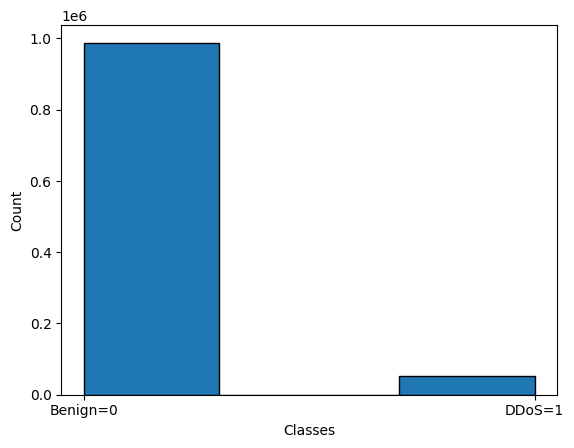

In [22]:
# Print the DataFrame

plt.hist(data_f['Label'], bins=[0, 0.3,0.7,1], edgecolor='black')  # Specify bins as [0, 1]
plt.xticks([0, 1], labels=['Benign=0', 'DDoS=1'])
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

## Data exploring

In [23]:
df.describe()

/home/kushal/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/kushal/.local/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,7.392499e+03,9.518465e+00,1.430739e+07,5.145998e+00,6.419784e+00,4.354262e+02,4.925884e+03,1.514397e+02,1.397992e+01,4.472574e+01,...,1.882254e+00,1.659039e+01,1.122396e+05,4.836921e+04,1.817948e+05,8.320523e+04,4.347475e+06,2.658500e+05,4.616676e+06,4.109270e+06
std,1.753869e+04,5.303721e+00,3.335503e+07,3.379921e+01,9.786280e+01,2.881334e+04,1.399474e+05,2.774302e+02,2.382720e+01,6.052267e+01,...,5.656394e+00,7.476644e+00,9.456190e+05,3.772539e+05,1.205154e+06,8.678863e+05,1.422425e+07,2.349741e+06,1.486555e+07,1.398498e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,6.000000e+00,4.130000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.000000e+00,3.689600e+04,2.000000e+00,1.000000e+00,4.400000e+01,9.900000e+01,4.100000e+01,0.000000e+00,3.600000e+01,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.450000e+02,1.700000e+01,3.377079e+06,5.000000e+00,4.000000e+00,3.330000e+02,4.880000e+02,1.610000e+02,3.500000e+01,5.366667e+01,...,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553400e+04,1.700000e+01,1.200000e+08,9.021000e+03,1.918100e+04,8.737314e+06,2.790523e+07,6.444000e+04,1.460000e+03,1.652931e+04,...,1.468000e+03,5.600000e+01,1.119924e+08,6.017711e+07,1.119924e+08,1.119924e+08,1.199915e+08,7.251285e+07,1.199915e+08,1.199915e+08


#### Plot the distribution of the features:

Dst Port 0


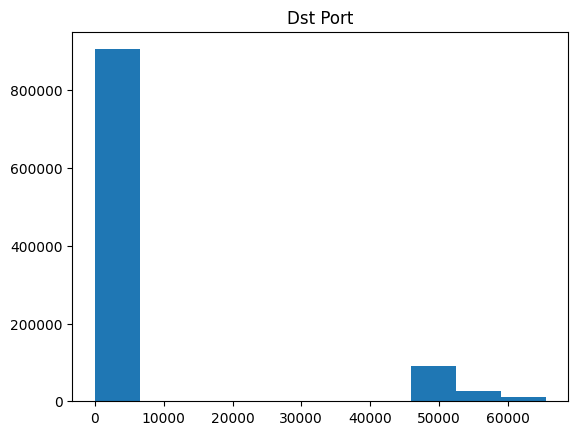

Protocol 1


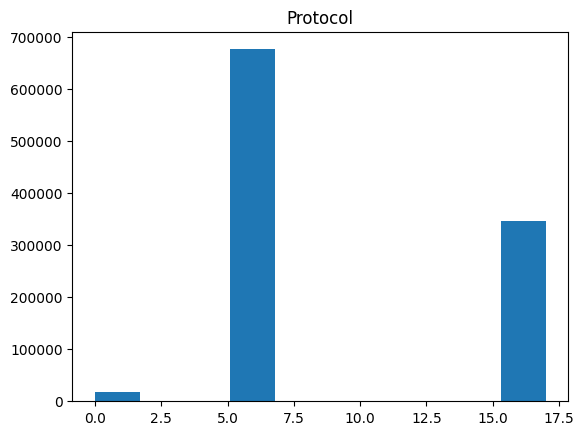

Flow Duration 2


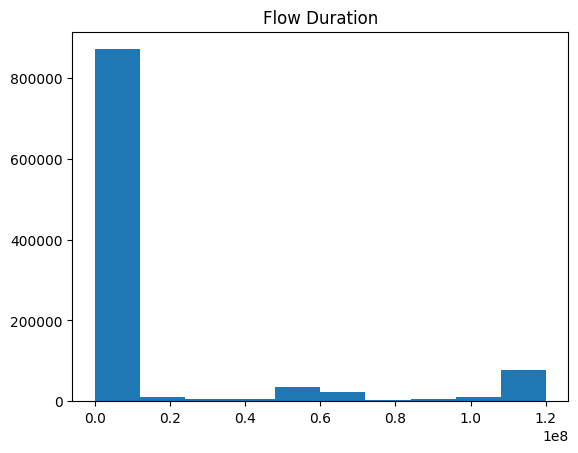

Tot Fwd Pkts 3


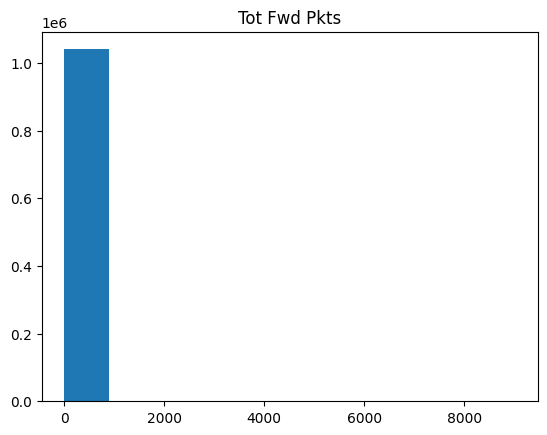

Tot Bwd Pkts 4


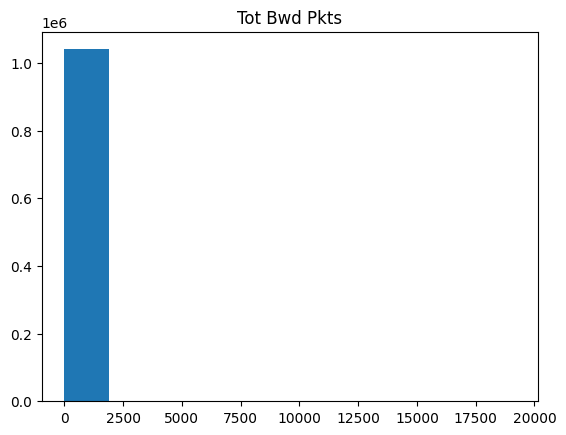

TotLen Fwd Pkts 5


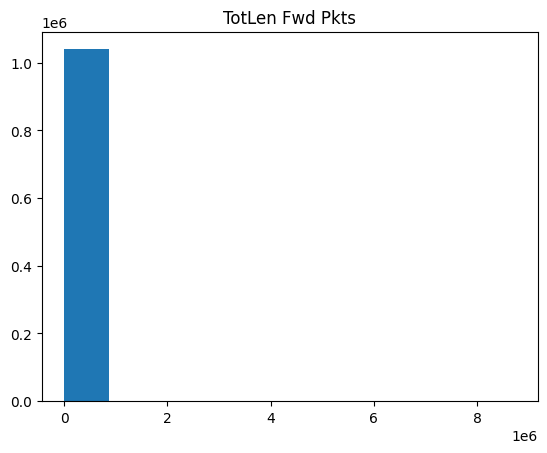

TotLen Bwd Pkts 6


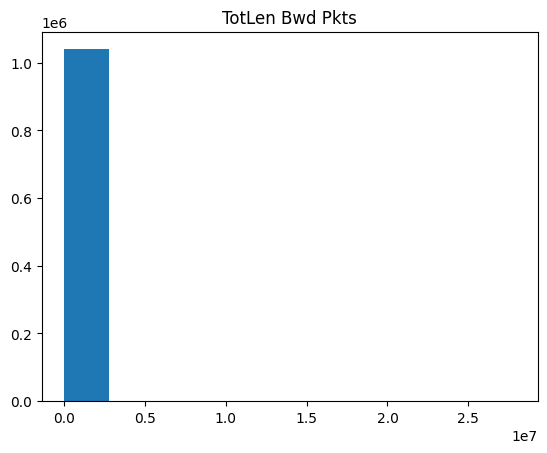

Fwd Pkt Len Max 7


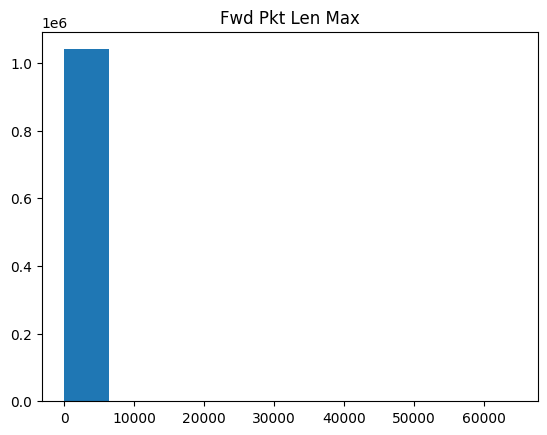

Fwd Pkt Len Min 8


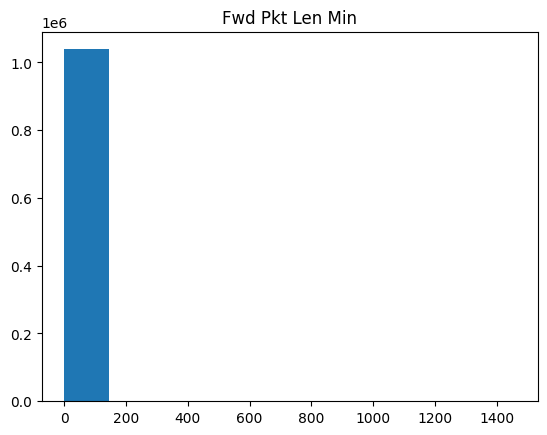

Fwd Pkt Len Mean 9


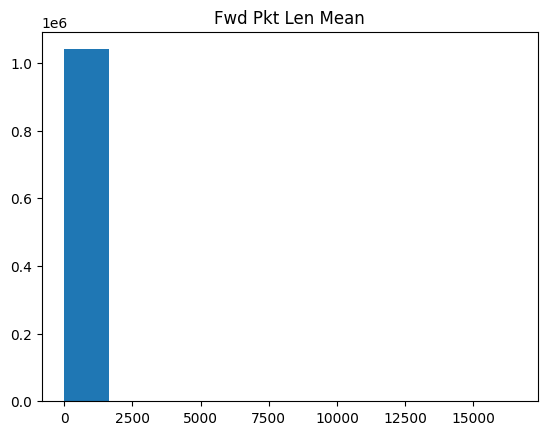

Fwd Pkt Len Std 10


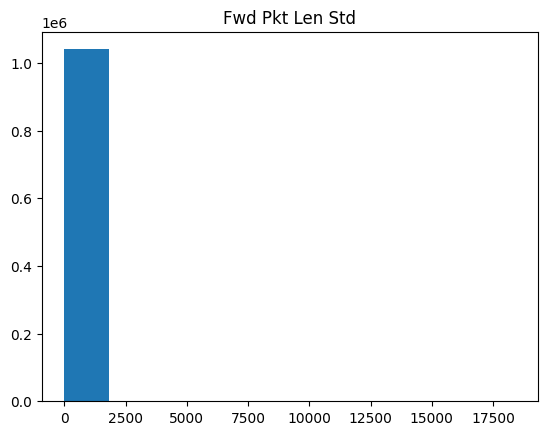

Bwd Pkt Len Max 11


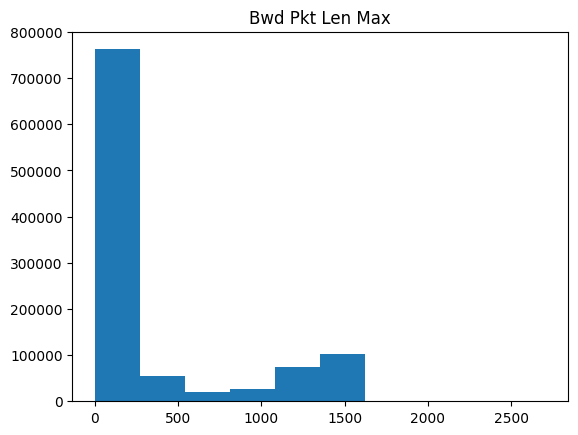

Bwd Pkt Len Min 12


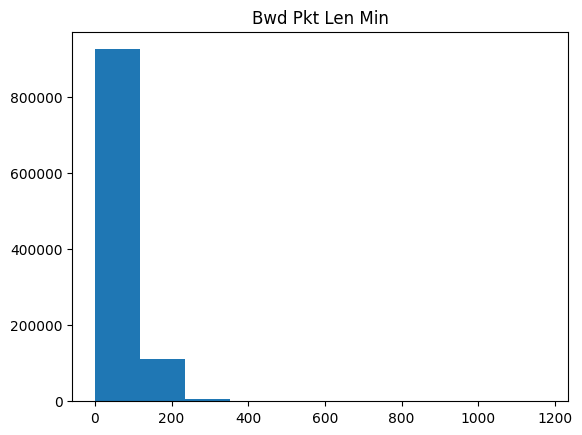

Bwd Pkt Len Mean 13


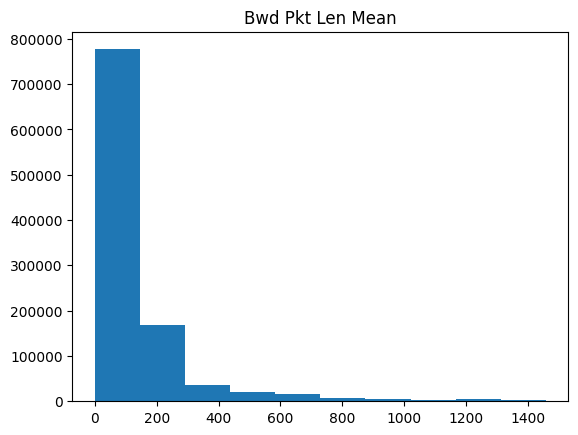

Bwd Pkt Len Std 14


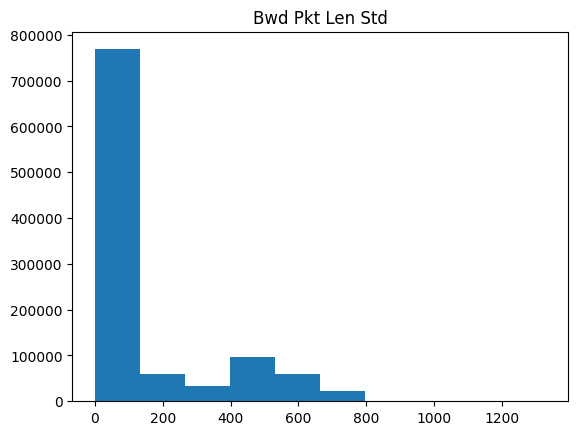

Flow Byts/s 15


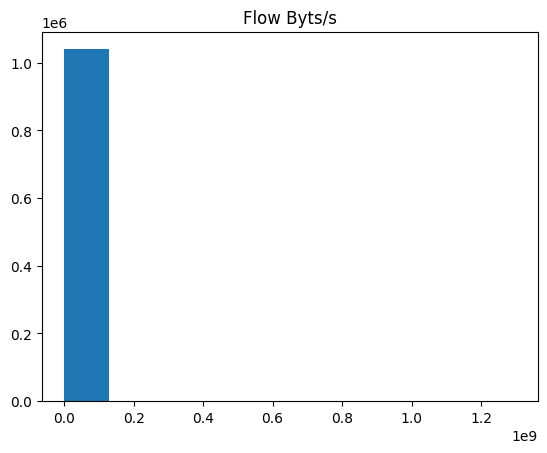

Flow Pkts/s 16


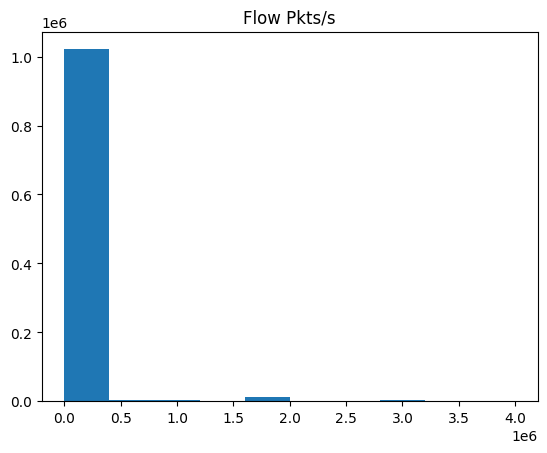

Flow IAT Mean 17


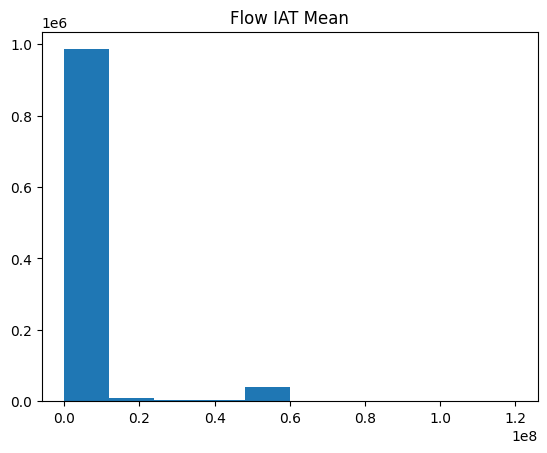

Flow IAT Std 18


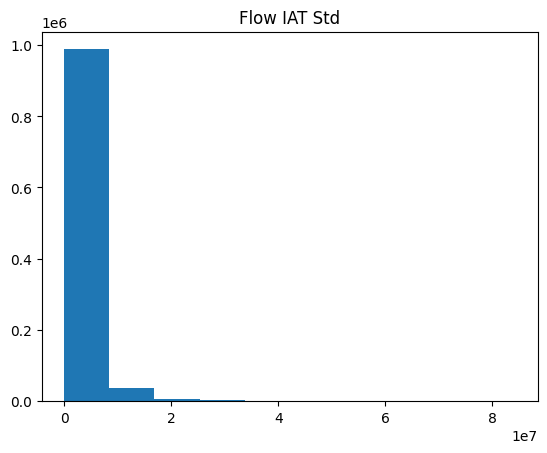

Flow IAT Max 19


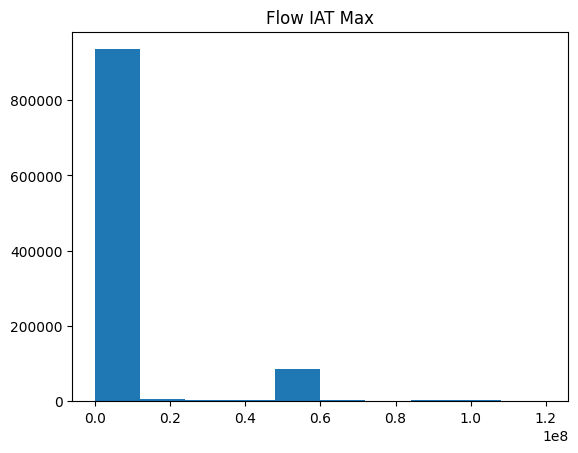

Flow IAT Min 20


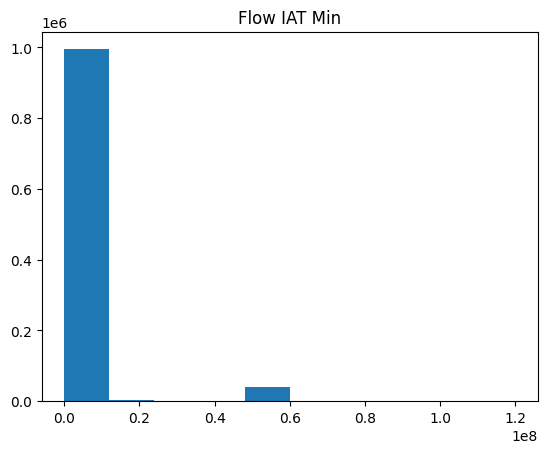

Fwd IAT Tot 21


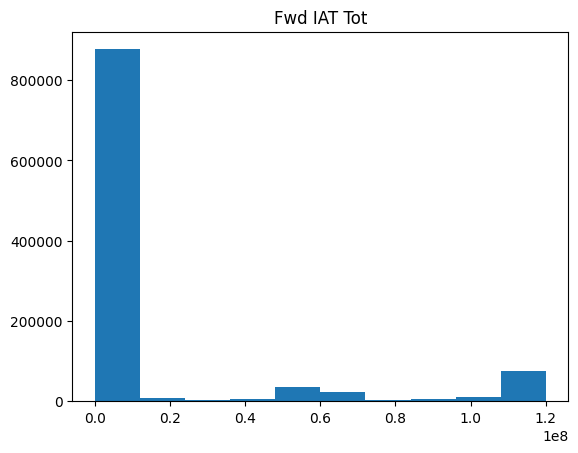

Fwd IAT Mean 22


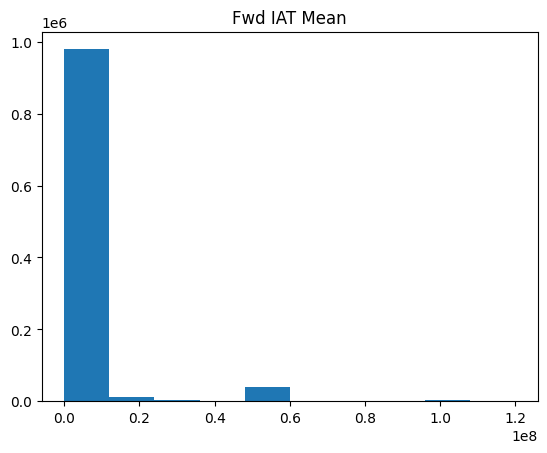

Fwd IAT Std 23


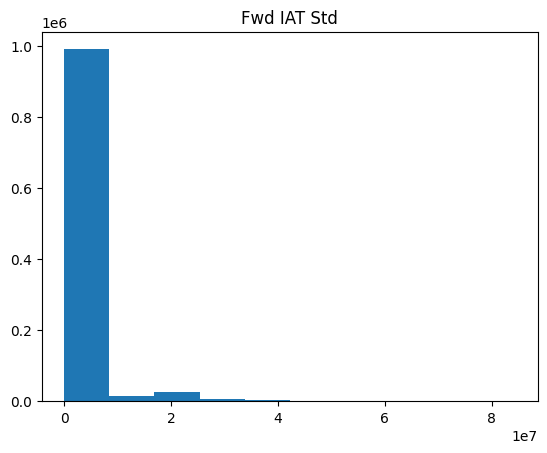

Fwd IAT Max 24


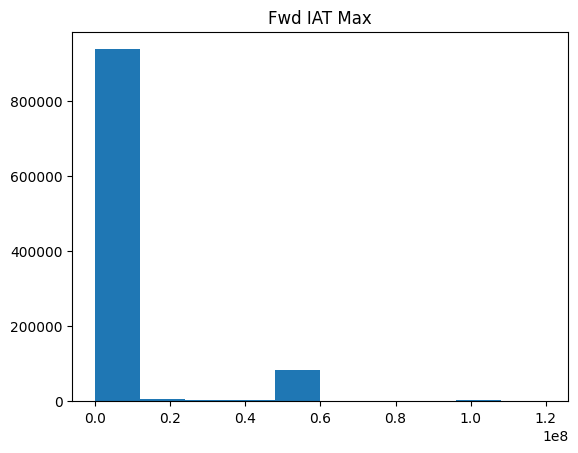

Fwd IAT Min 25


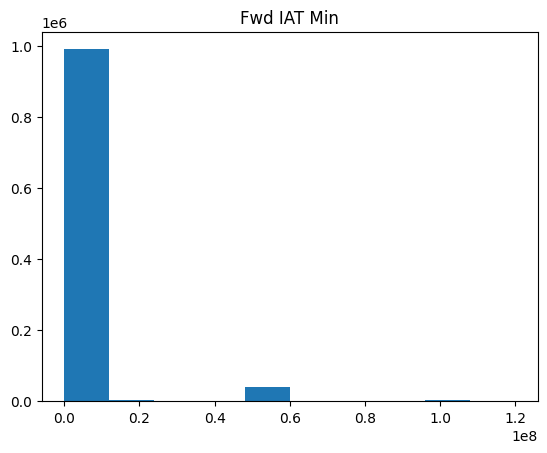

Bwd IAT Tot 26


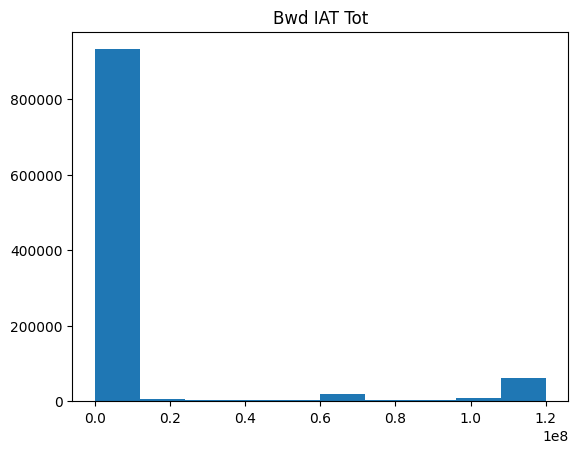

Bwd IAT Mean 27


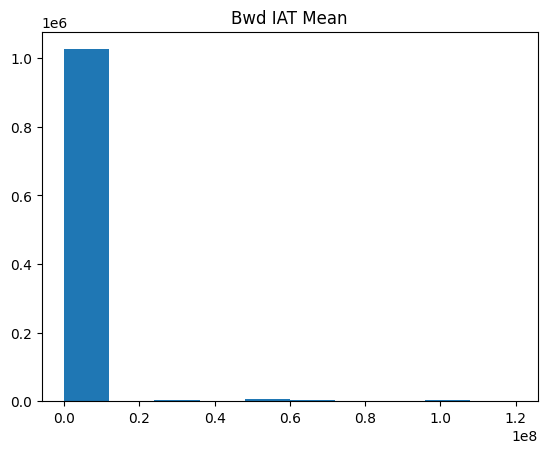

Bwd IAT Std 28


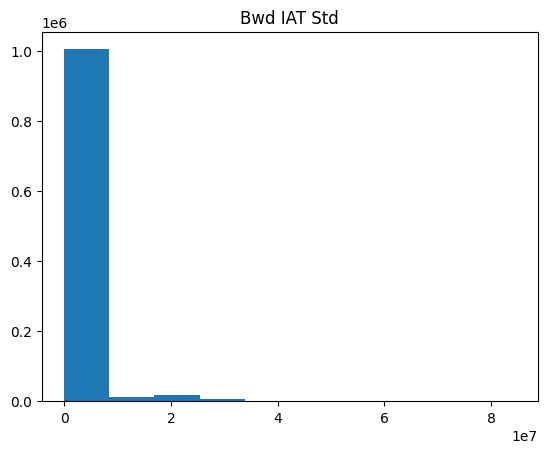

Bwd IAT Max 29


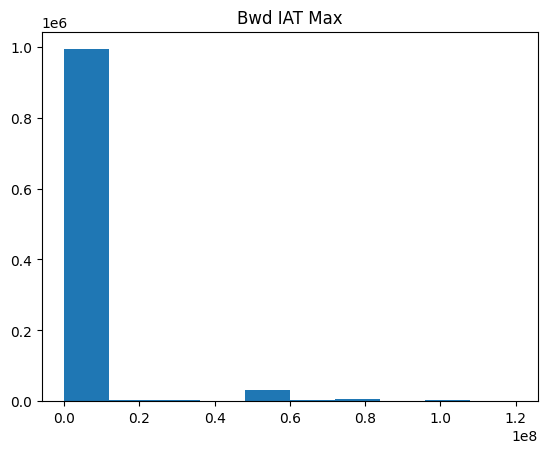

Bwd IAT Min 30


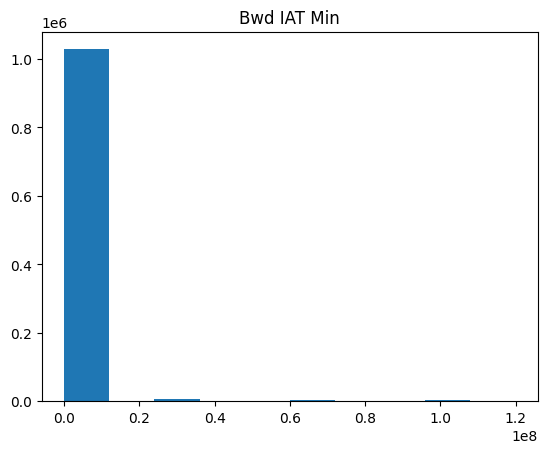

Fwd PSH Flags 31


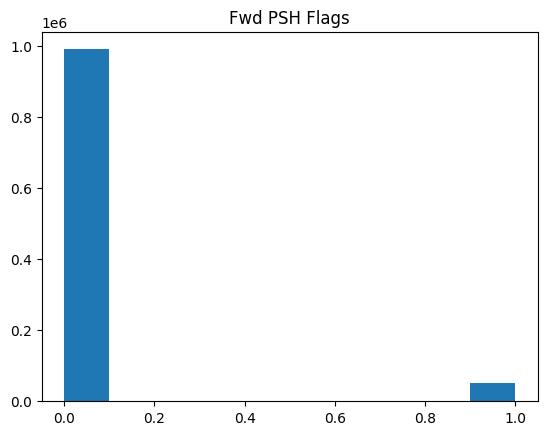

Bwd PSH Flags 32


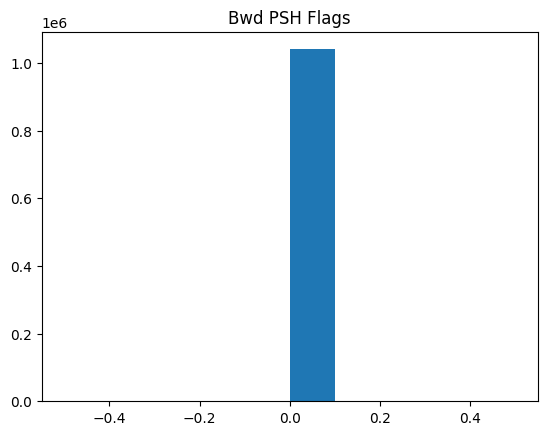

Fwd URG Flags 33


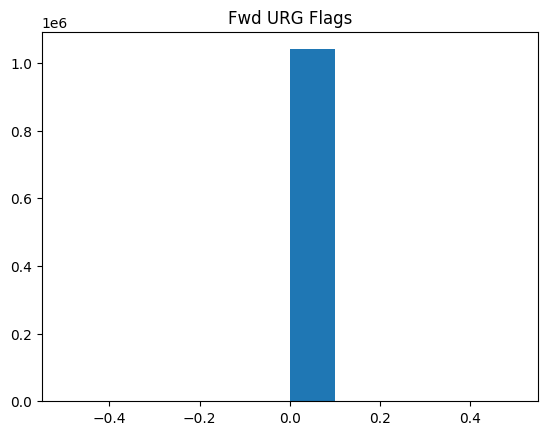

Bwd URG Flags 34


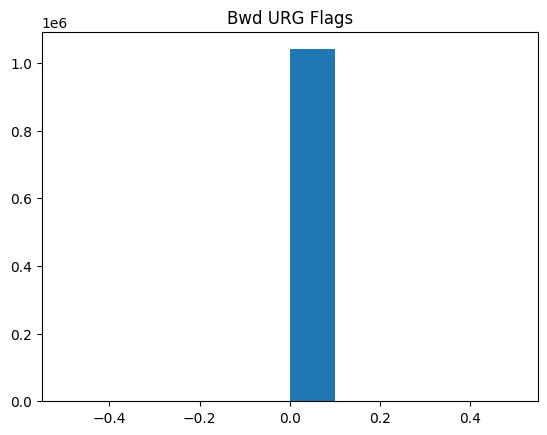

Fwd Header Len 35


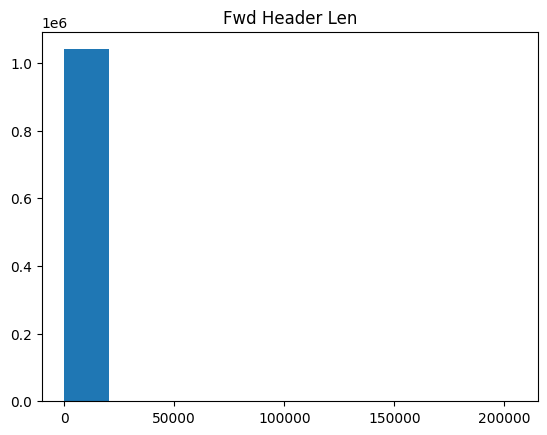

Bwd Header Len 36


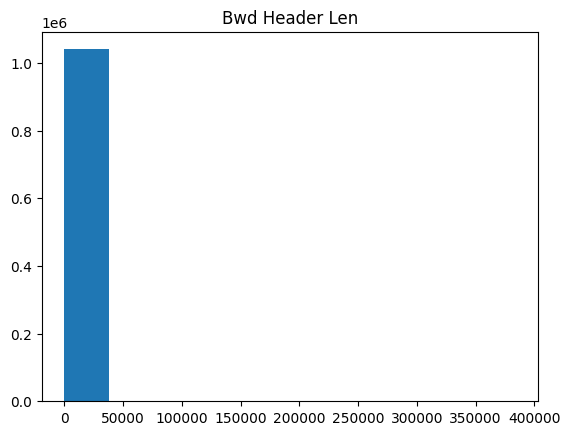

Fwd Pkts/s 37


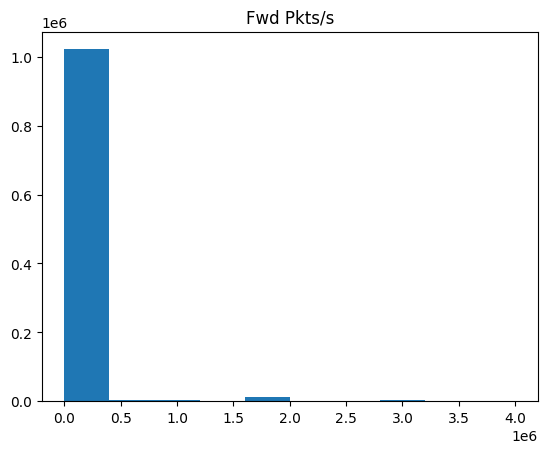

Bwd Pkts/s 38


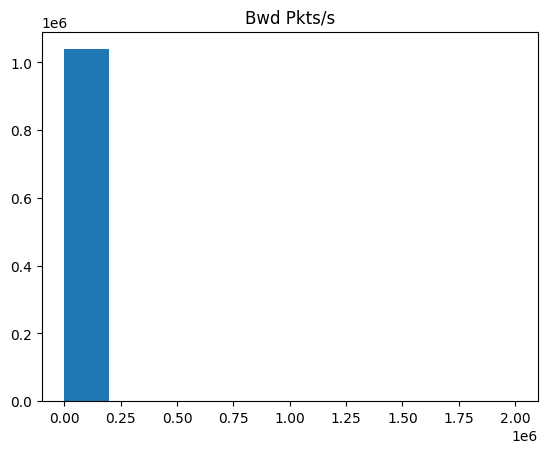

Pkt Len Min 39


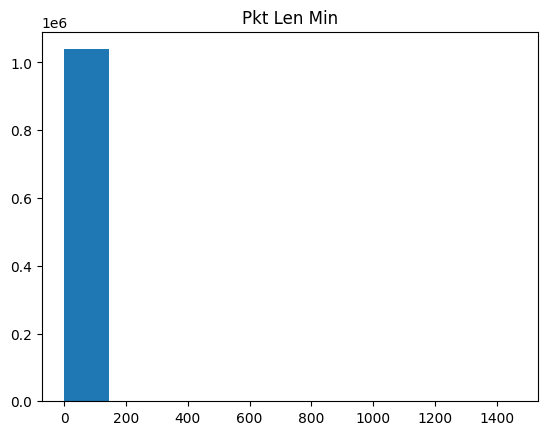

Pkt Len Max 40


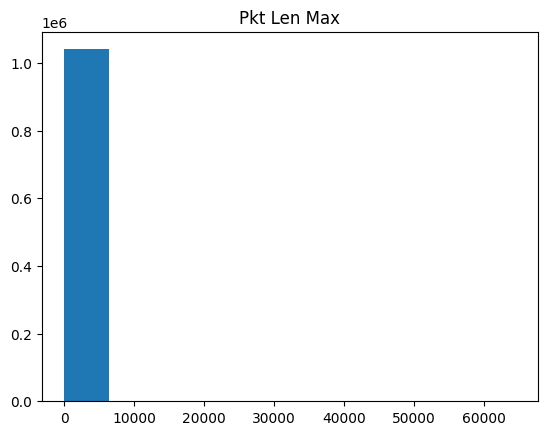

Pkt Len Mean 41


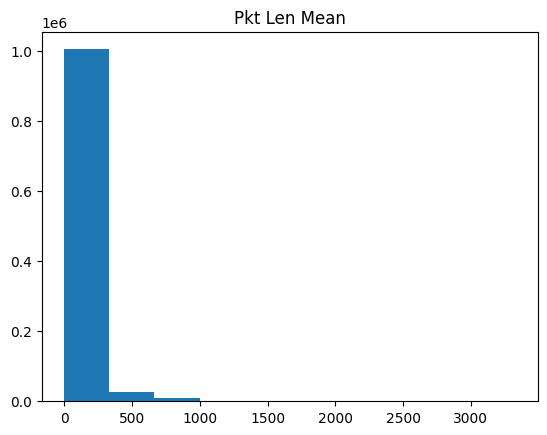

Pkt Len Std 42


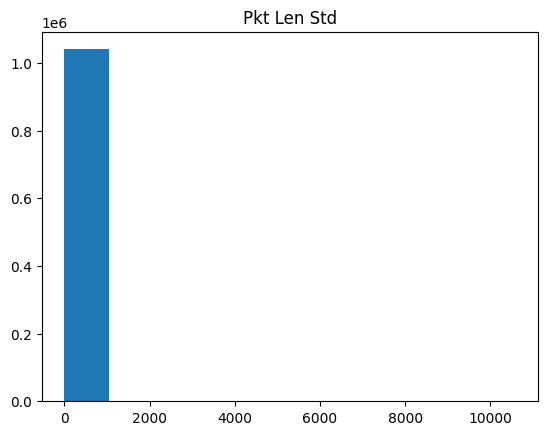

Pkt Len Var 43


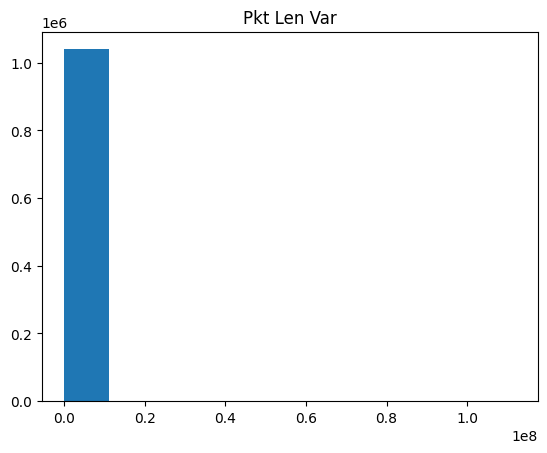

FIN Flag Cnt 44


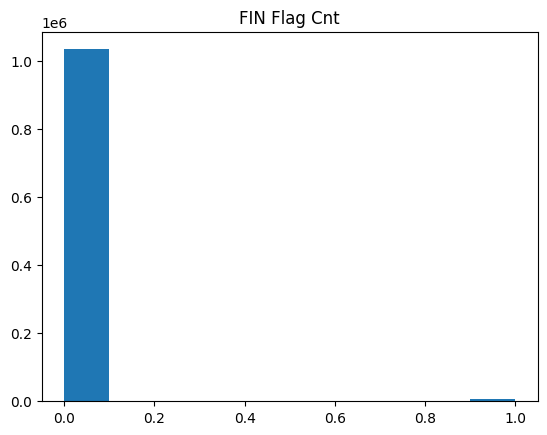

SYN Flag Cnt 45


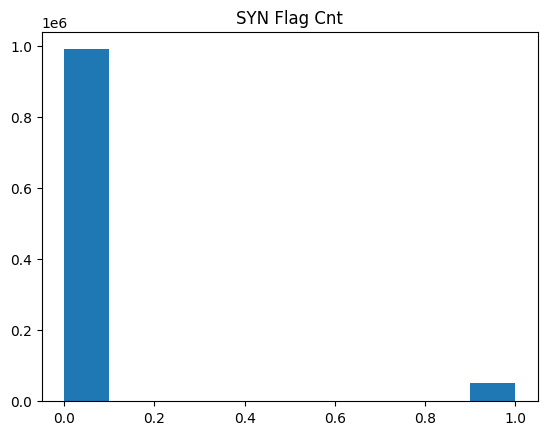

RST Flag Cnt 46


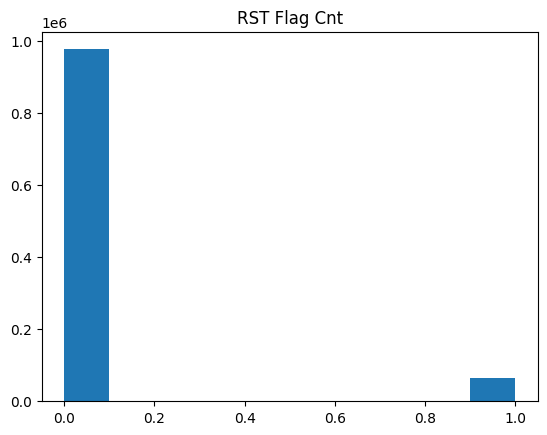

PSH Flag Cnt 47


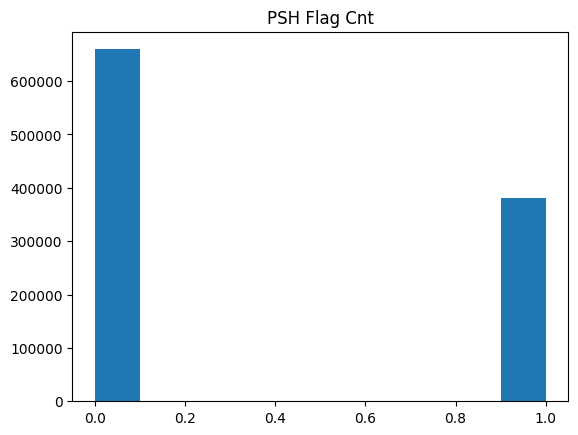

ACK Flag Cnt 48


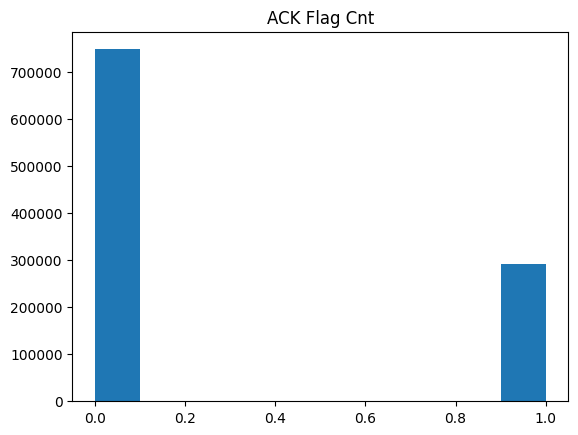

URG Flag Cnt 49


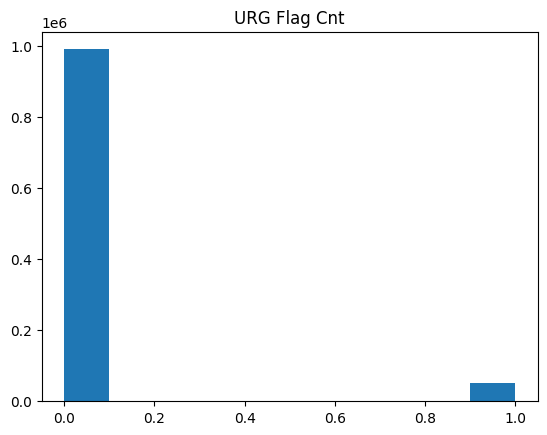

CWE Flag Count 50


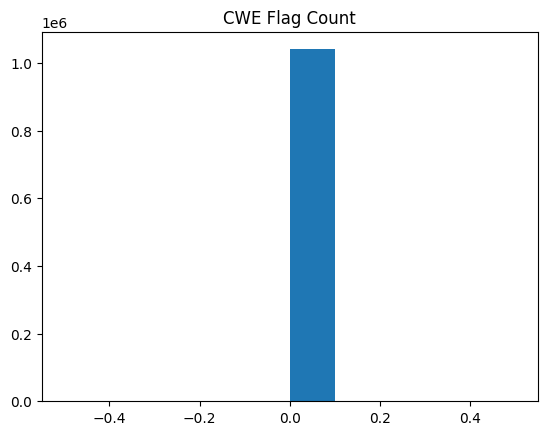

ECE Flag Cnt 51


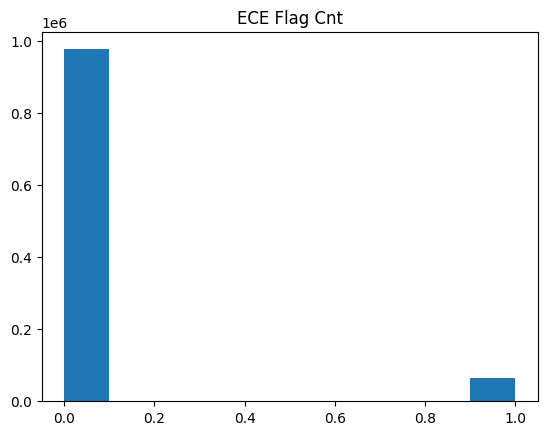

Down/Up Ratio 52


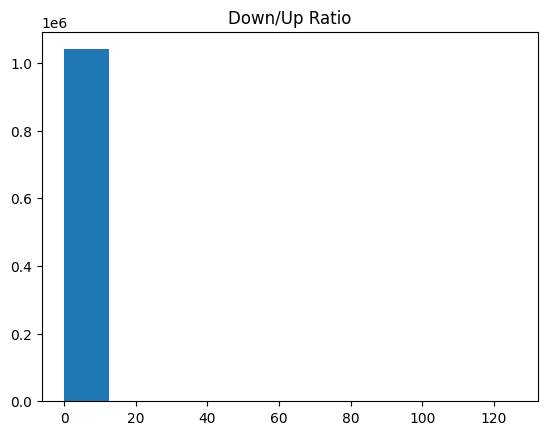

Pkt Size Avg 53


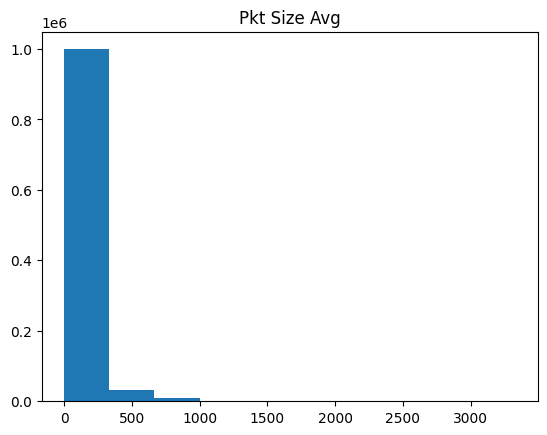

Fwd Seg Size Avg 54


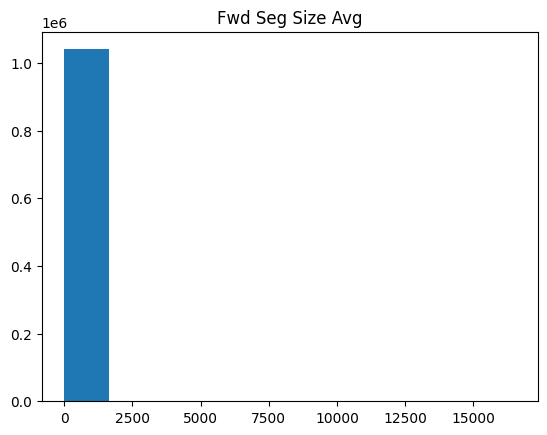

Bwd Seg Size Avg 55


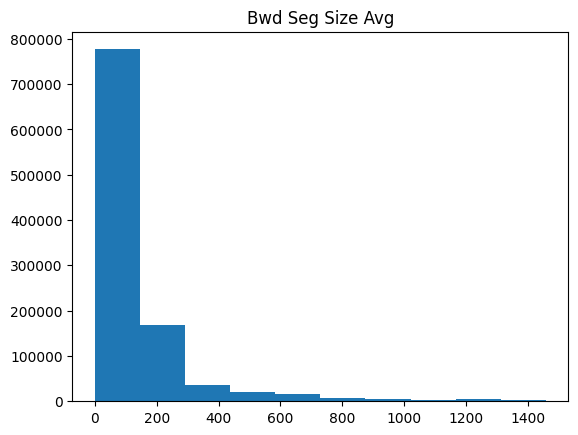

Fwd Byts/b Avg 56


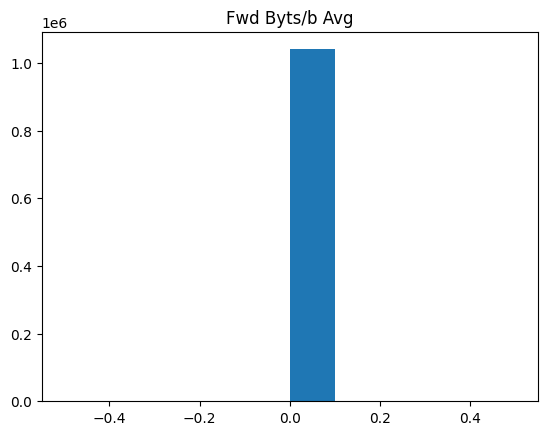

Fwd Pkts/b Avg 57


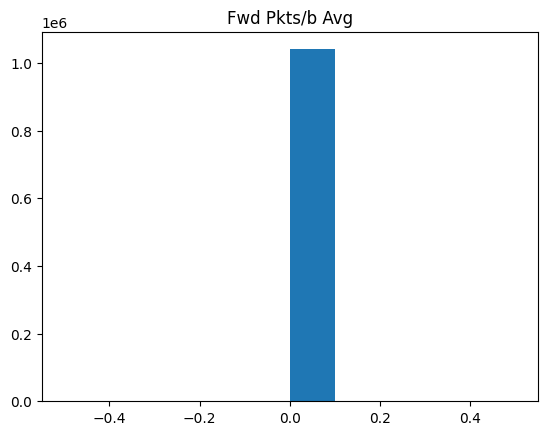

Fwd Blk Rate Avg 58


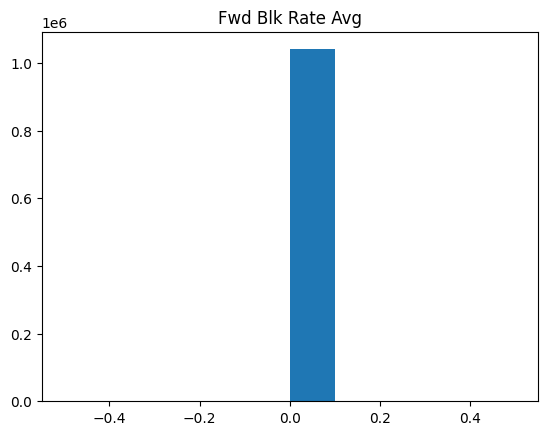

Bwd Byts/b Avg 59


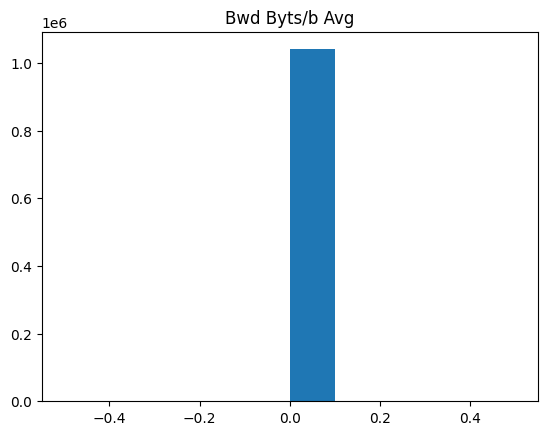

Bwd Pkts/b Avg 60


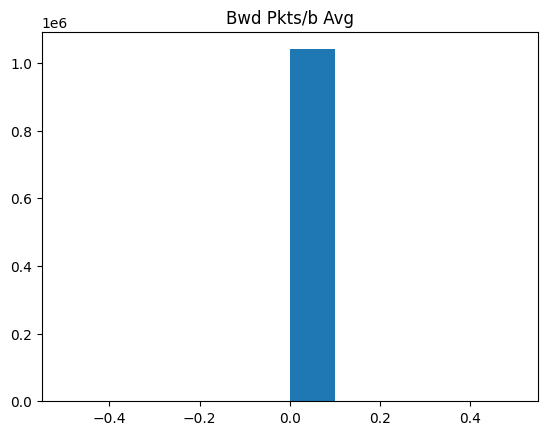

Bwd Blk Rate Avg 61


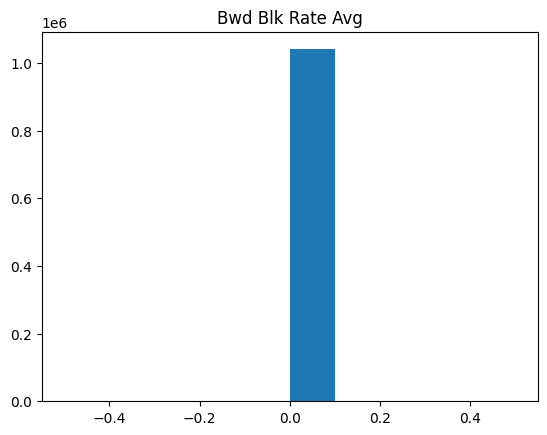

Subflow Fwd Pkts 62


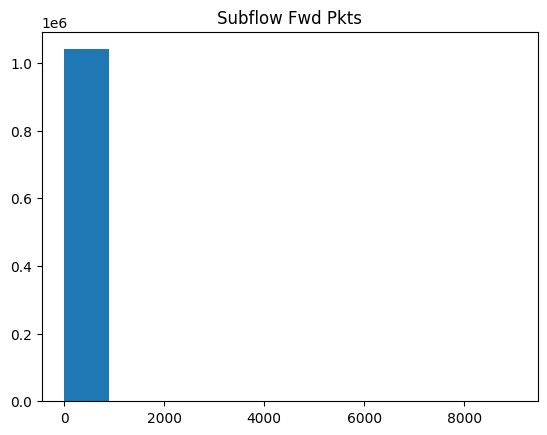

Subflow Fwd Byts 63


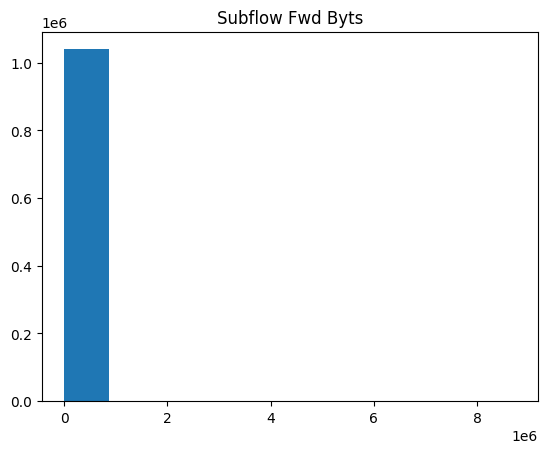

Subflow Bwd Pkts 64


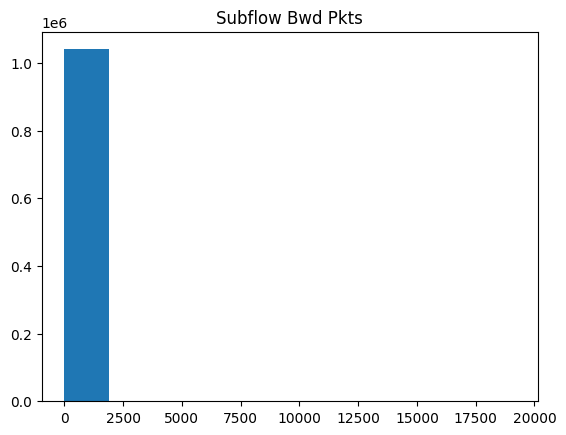

Subflow Bwd Byts 65


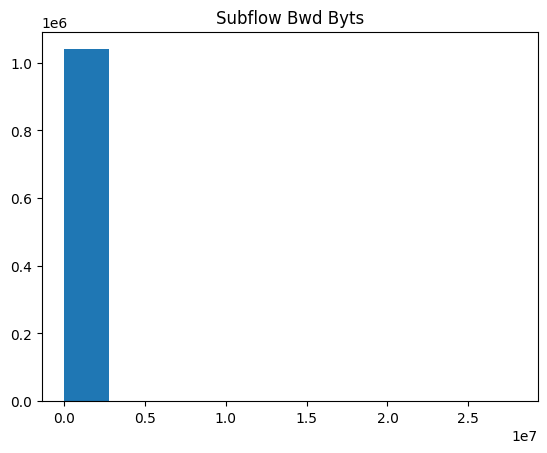

Init Fwd Win Byts 66


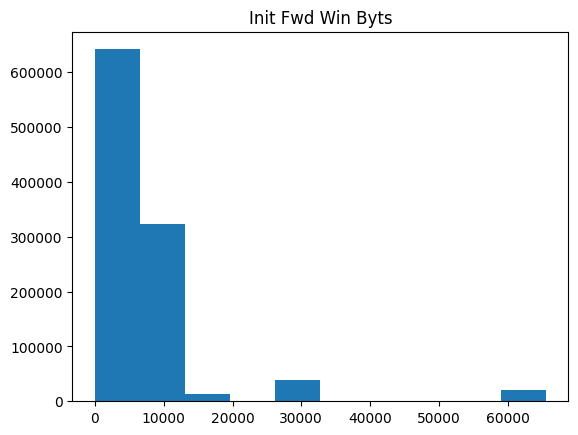

Init Bwd Win Byts 67


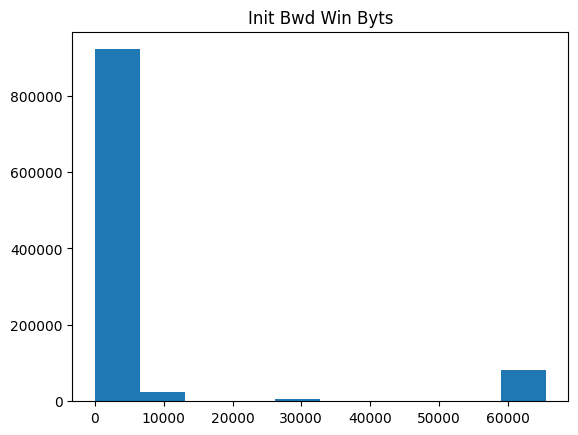

Fwd Act Data Pkts 68


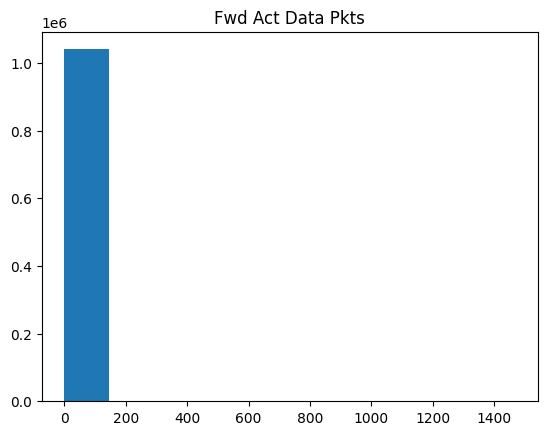

Fwd Seg Size Min 69


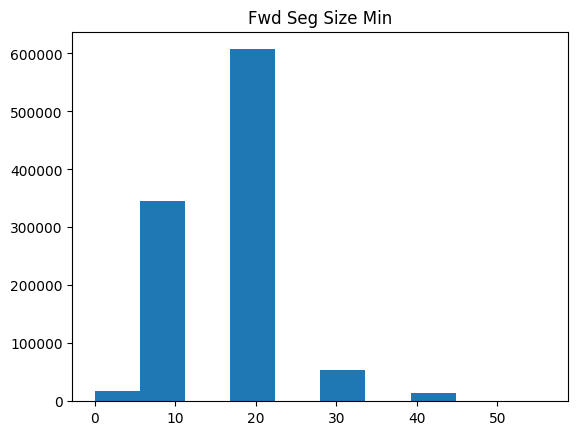

Active Mean 70


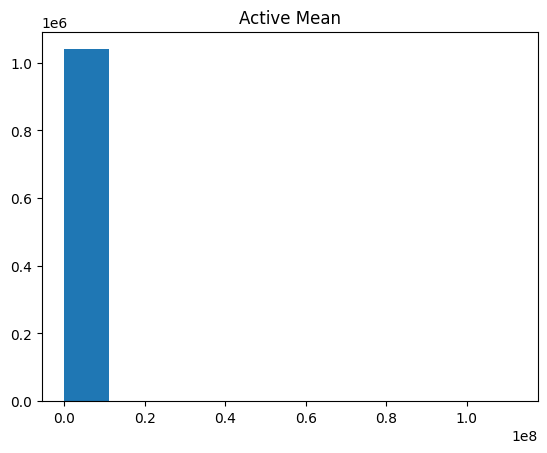

Active Std 71


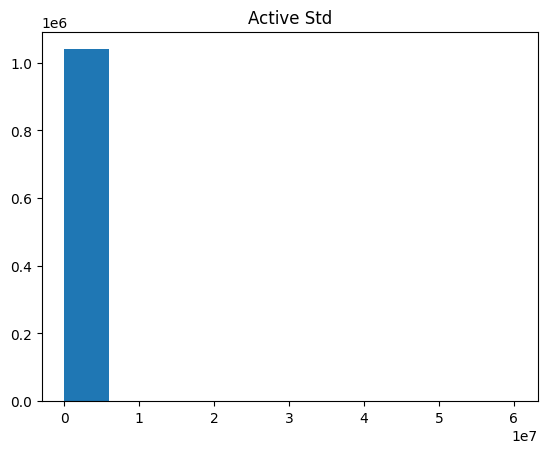

Active Max 72


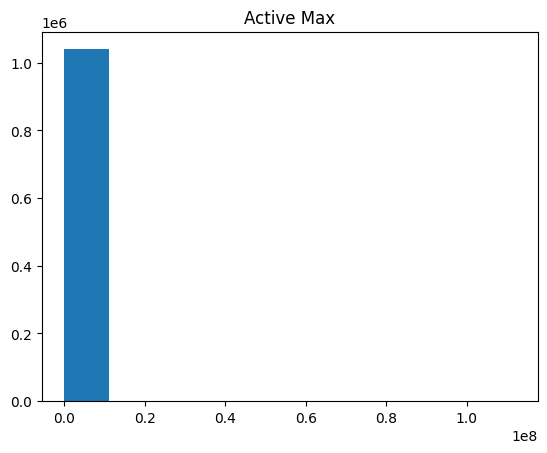

Active Min 73


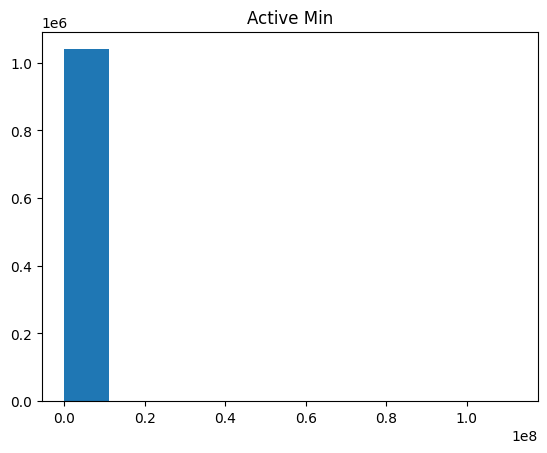

Idle Mean 74


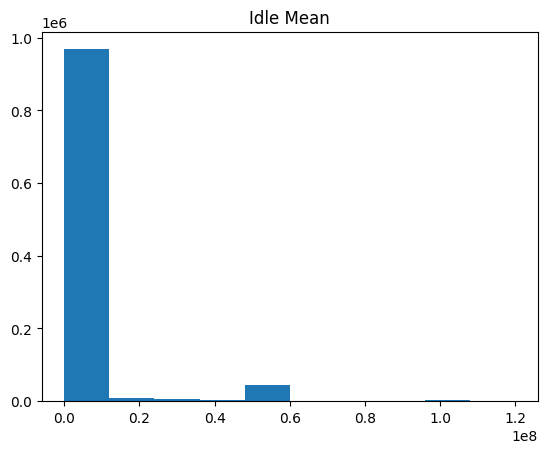

Idle Std 75


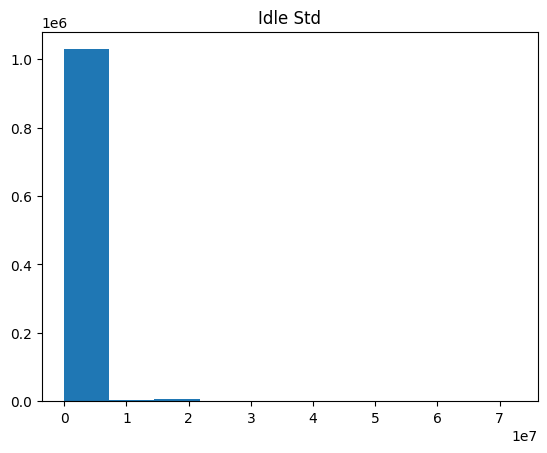

Idle Max 76


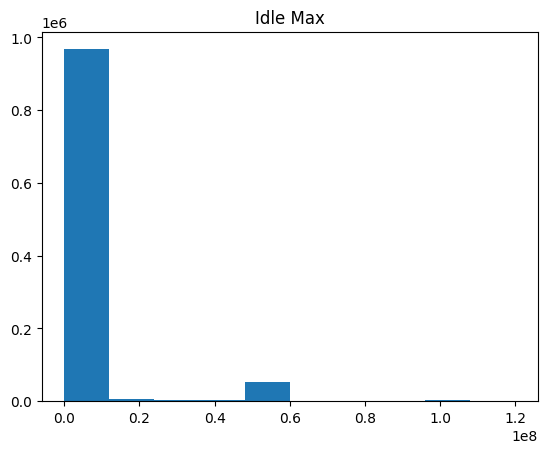

Idle Min 77


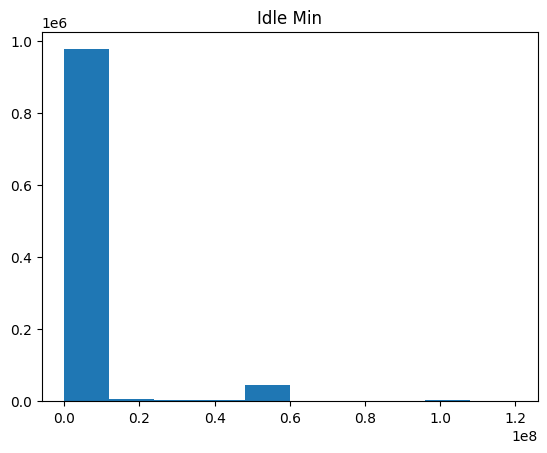

Label 78


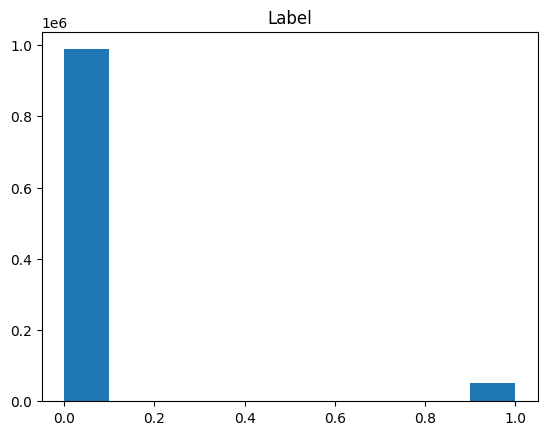

In [24]:
# Create a histogram plot for each feature
plt.figure(5)
i=0
for col in data_f.columns:
    print(col,i)
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()
    i+=1

## Data splitting into train and test

In [25]:
# Convert into numpy array

#X1=np.array(data_f).astype(np.float64)
#y1=np.array(data_f['Label'])



In [26]:
# Split data into features and target variable
X = data_f.drop('Label', axis=1)
y = data_f['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [27]:
print("The train dataset size = ",X_train.shape)
print("The test dataset size = ",X_test.shape)

The train dataset size =  (728383, 78)
The test dataset size =  (312165, 78)


# ----------------------------Training the model-------------------------------- 

### Random Forest

In [28]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=7, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

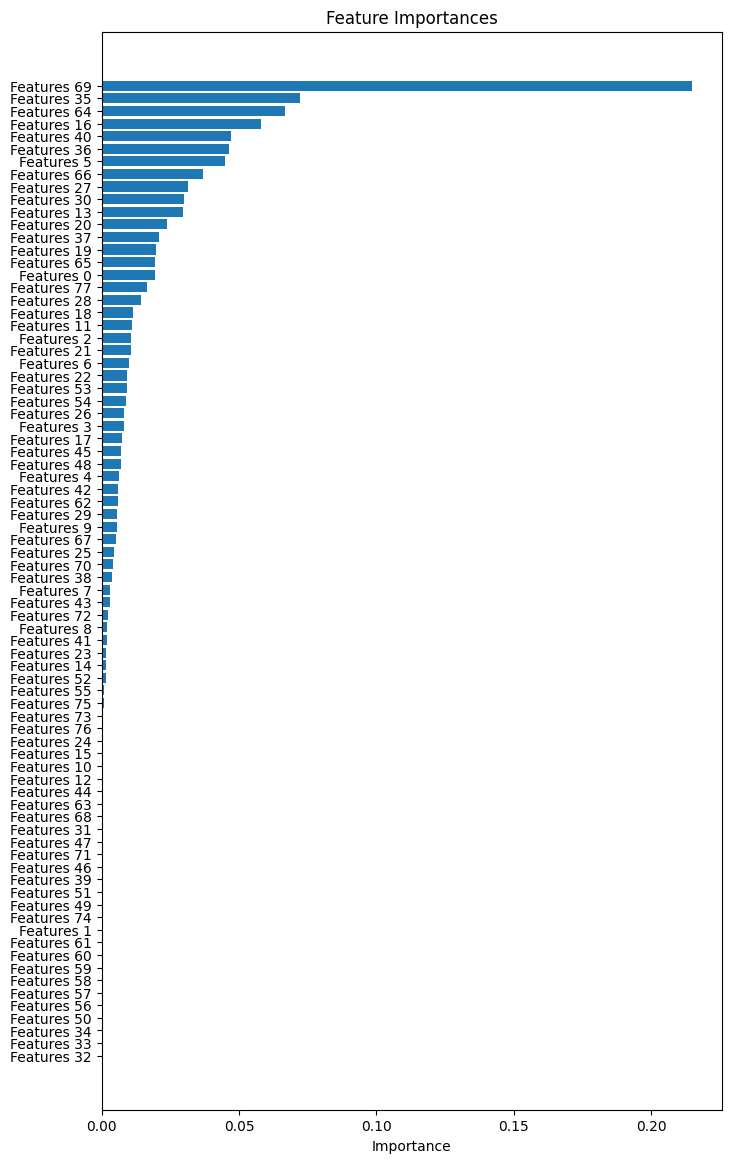

In [29]:
# Getting feature importances from the trained model
importances = rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=False)
feature_names = [f"Features {i}" for i in indices]  # Replace with your column names

# Plotting feature importances horizontally
plt.figure(figsize=(8, 14))
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), feature_names)
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

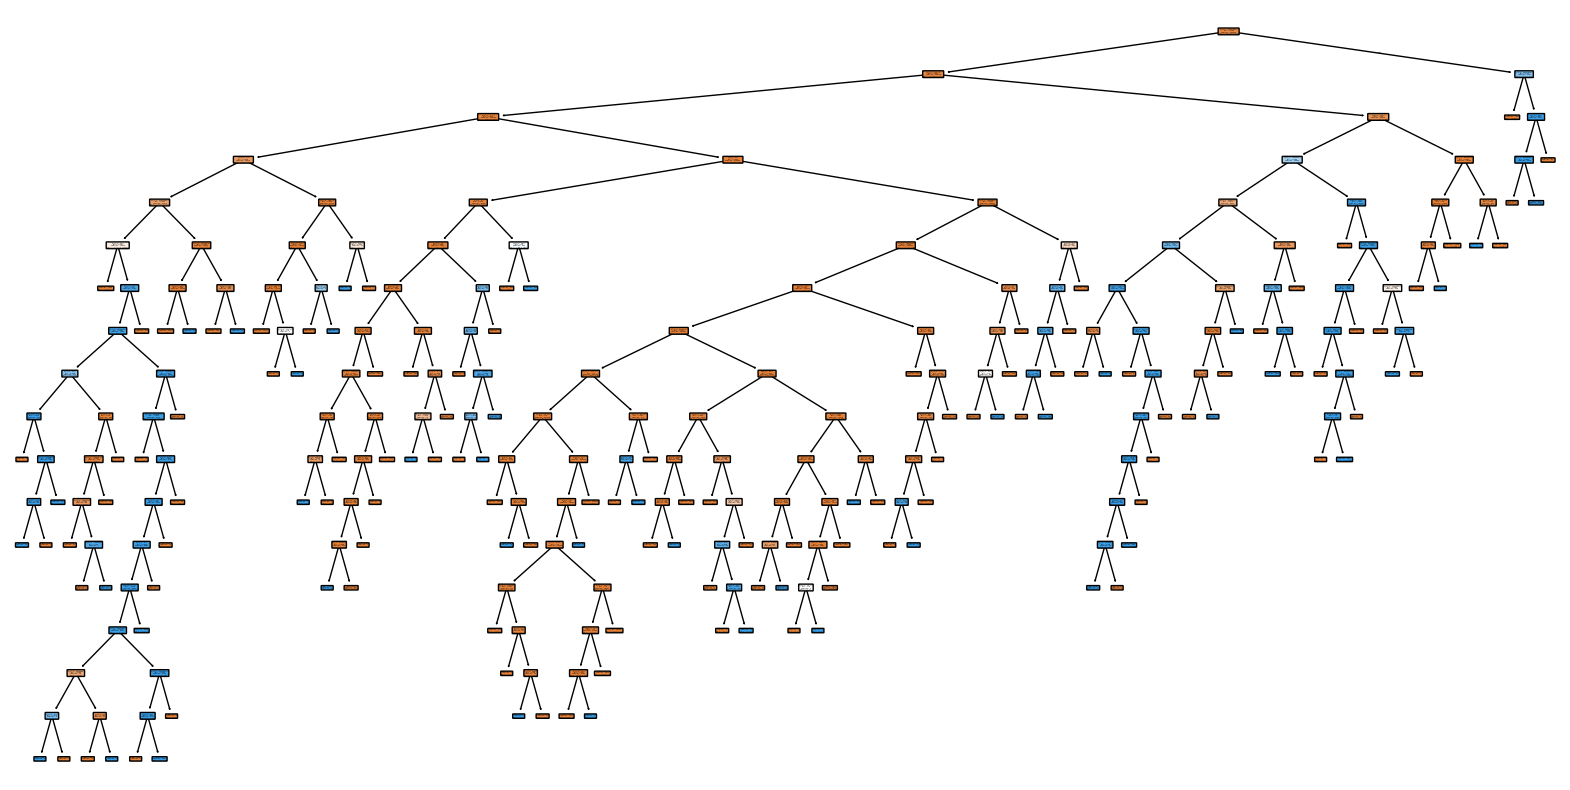

In [33]:
from sklearn.tree import plot_tree

estimator = rf_model.estimators_[0]  # Selecting the first estimator from the random forest model


plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, rounded=True)
plt.show()

### Model Evaluation 

In [34]:
# Function to generate and display a detailed confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [35]:
# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print('\nRandom Forest Metrics:')
print(f'Accuracy: {rf_accuracy:.4f}')
print(f'F1 Score: {rf_f1:.4f}')
print(f'Precision: {rf_precision:.4f}')
print(f'Recall: {rf_recall:.4f}')


Random Forest Metrics:
Accuracy: 1.0000
F1 Score: 0.9997
Precision: 0.9998
Recall: 0.9996


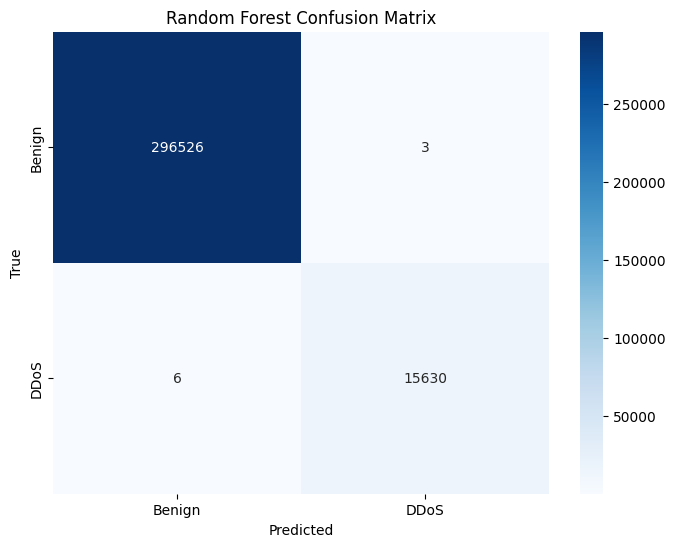

In [36]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, ['Benign', 'DDoS'], 'Random Forest Confusion Matrix')

### Logistic Regression

In [37]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

/home/kushal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluate Logistic Regression

In [38]:

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)

In [39]:
print('\nLogistic Regression Metrics:')
print(f'Accuracy: {lr_accuracy:.4f}')
print(f'F1 Score: {lr_f1:.4f}')
print(f'Precision: {lr_precision:.4f}')
print(f'Recall: {lr_recall:.4f}')




Logistic Regression Metrics:
Accuracy: 0.9574
F1 Score: 0.4892
Precision: 0.6119
Recall: 0.4075


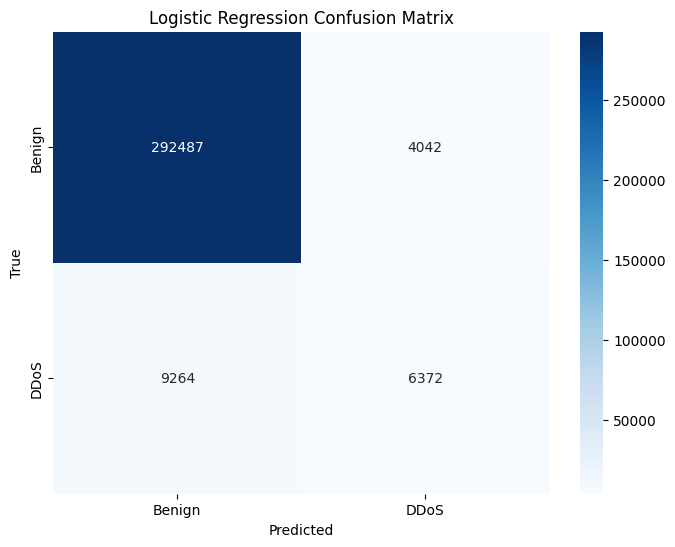

In [40]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test, lr_pred, ['Benign', 'DDoS'], 'Logistic Regression Confusion Matrix')


### Neural Network

In [41]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10, random_state=42)
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)

/home/kushal/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


### # Evaluate Neural Network

In [42]:
nn_accuracy = accuracy_score(y_test, nn_pred)
nn_f1 = f1_score(y_test, nn_pred)
nn_precision = precision_score(y_test, nn_pred)
nn_recall = recall_score(y_test, nn_pred)

print('\nNeural Network Metrics:')
print(f'Accuracy: {nn_accuracy:.4f}')
print(f'F1 Score: {nn_f1:.4f}')
print(f'Precision: {nn_precision:.4f}')
print(f'Recall: {nn_recall:.4f}')


Neural Network Metrics:
Accuracy: 0.9507
F1 Score: 0.0311
Precision: 1.0000
Recall: 0.0158


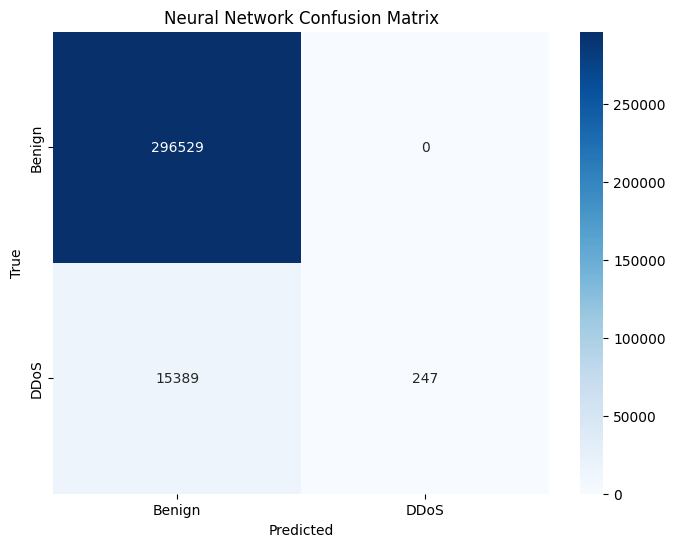

In [43]:
# Confusion Matrix for Neural Network
plot_confusion_matrix(y_test, nn_pred, ['Benign', 'DDoS'], 'Neural Network Confusion Matrix')

## Model Comparison

In [44]:
# Random Forest
rf_proba = rf_model.predict_proba(X_test)

# Logistic Regression
lr_proba = lr_model.predict_proba(X_test)



# Neural Network
nn_proba = nn_model.predict_proba(X_test)


In [45]:
# Combine predictions for ROC curve



# Calculate ROC curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_proba[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)

# Calculate ROC curve for Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_proba[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)



# Calculate ROC curve for Neural Network
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_proba[:, 1])
nn_auc = auc(nn_fpr, nn_tpr)


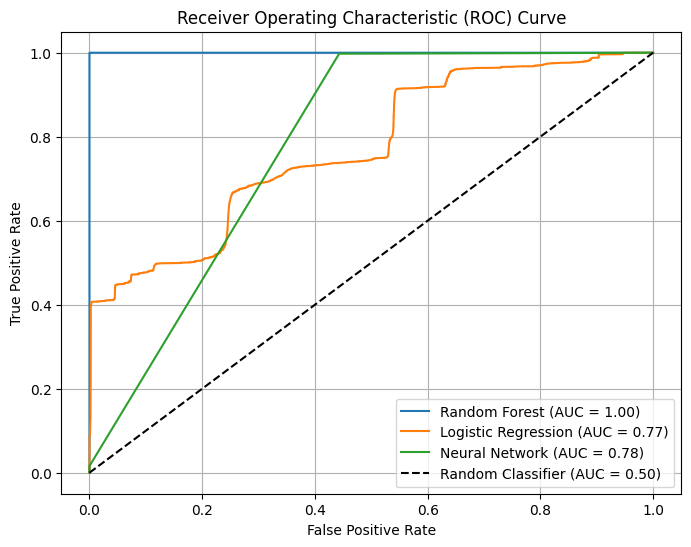

In [46]:
# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')

# Plot ROC curve for random classifier (50% area)
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Classifier (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()